In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#----------------------------------------数据载入与分析-------------------------------------------------------------
#训练数据
train_data = pd.read_csv(r"D:\Code\Jupyter-notebook\data\2001_SPECTF Heart Data Set\SPECTF_train.txt",header=None)
#测试数据
test_data = pd.read_csv(r"D:\Code\Jupyter-notebook\data\2001_SPECTF Heart Data Set\SPECTF_test.txt",header=None)

#添加特征名称行
train_data.columns = ['OVERALL_DIAGNOSIS','F1R','F1S','F2R','F2S','F3R','F3S','F4R','F4S','F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S',
                     'F9R','F9S','F10R','F10S','F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S',
                      'F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S','F20R','F20S','F21R','F21S','F22R','F22S']
test_data.columns = ['OVERALL_DIAGNOSIS','F1R','F1S','F2R','F2S','F3R','F3S','F4R','F4S','F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S',
                     'F9R','F9S','F10R','F10S','F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S',
                      'F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S','F20R','F20S','F21R','F21S','F22R','F22S']

print(train_data.shape,test_data.shape)
train_data.head()




(80, 45) (187, 45)


,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [2]:
#数据信息
'''训练数据集比较简单，均为连续数值，没有缺失值，数据大小在同一维度。百分之50诊断为1。'''
print(train_data.info())
# train_data.isnull().sum()   
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
OVERALL_DIAGNOSIS    80 non-null int64
F1R                  80 non-null int64
F1S                  80 non-null int64
F2R                  80 non-null int64
F2S                  80 non-null int64
F3R                  80 non-null int64
F3S                  80 non-null int64
F4R                  80 non-null int64
F4S                  80 non-null int64
F5R                  80 non-null int64
F5S                  80 non-null int64
F6R                  80 non-null int64
F6S                  80 non-null int64
F7R                  80 non-null int64
F7S                  80 non-null int64
F8R                  80 non-null int64
F8S                  80 non-null int64
F9R                  80 non-null int64
F9S                  80 non-null int64
F10R                 80 non-null int64
F10S                 80 non-null int64
F11R                 80 non-null int64
F11S                 80 non-null int64


,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,68.650000,67.55000,69.550000,70.850000,67.100000,67.687500,72.075000,71.387500,64.362500,...,65.18750,64.662500,65.612500,65.01250,69.437500,68.412500,66.33750,65.100000,55.975000,55.075000
std,0.503155,5.594075,6.88403,5.901941,6.326757,6.251278,6.622925,4.090047,5.715831,7.425996,...,5.71273,7.538834,7.694308,9.44336,7.809186,8.582723,10.62591,11.345662,10.779698,12.119422
min,0.000000,57.000000,51.00000,52.000000,51.000000,47.000000,46.000000,63.000000,56.000000,26.000000,...,31.00000,13.000000,33.000000,23.00000,31.000000,30.000000,31.00000,30.000000,11.000000,11.000000
25%,0.000000,64.750000,64.00000,66.000000,67.000000,63.750000,63.750000,68.750000,69.000000,61.000000,...,63.00000,63.000000,62.750000,62.00000,65.000000,65.000000,64.00000,63.000000,53.000000,52.750000
50%,0.500000,69.000000,67.00000,70.000000,72.000000,68.000000,68.500000,72.500000,72.000000,65.000000,...,66.00000,65.500000,66.000000,66.50000,70.500000,71.000000,69.00000,68.000000,59.000000,58.000000
75%,1.000000,72.000000,73.00000,74.000000,75.250000,71.000000,71.250000,75.000000,75.000000,68.250000,...,68.00000,69.000000,71.000000,71.00000,74.000000,74.000000,73.25000,71.000000,63.000000,63.000000
max,1.000000,80.000000,81.00000,82.000000,84.000000,78.000000,89.000000,79.000000,83.000000,77.000000,...,73.00000,73.000000,77.000000,77.00000,83.000000,80.000000,79.00000,83.000000,71.000000,73.000000


In [3]:
'''测试数据集比较简单，均为连续数值，没有缺失值，数据大小在同一维度。百分之90诊断为1'''
print(test_data.info())
# test_data.isnull().sum()
test_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
OVERALL_DIAGNOSIS    187 non-null int64
F1R                  187 non-null int64
F1S                  187 non-null int64
F2R                  187 non-null int64
F2S                  187 non-null int64
F3R                  187 non-null int64
F3S                  187 non-null int64
F4R                  187 non-null int64
F4S                  187 non-null int64
F5R                  187 non-null int64
F5S                  187 non-null int64
F6R                  187 non-null int64
F6S                  187 non-null int64
F7R                  187 non-null int64
F7S                  187 non-null int64
F8R                  187 non-null int64
F8S                  187 non-null int64
F9R                  187 non-null int64
F9S                  187 non-null int64
F10R                 187 non-null int64
F10S                 187 non-null int64
F11R                 187 non-null int64
F11S           

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


Text(0.5, 1.0, 'spectf_test')

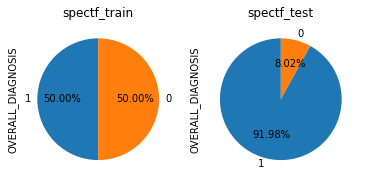

In [4]:
#训练集和测试集的target数量
plt.subplot(121)
train_data['OVERALL_DIAGNOSIS'].value_counts().plot.pie(autopct='%.2f%%',startangle=90)
plt.title("spectf_train")
plt.subplot(122)
test_data['OVERALL_DIAGNOSIS'].value_counts().plot.pie(autopct='%.2f%%',startangle=90)
plt.title("spectf_test")

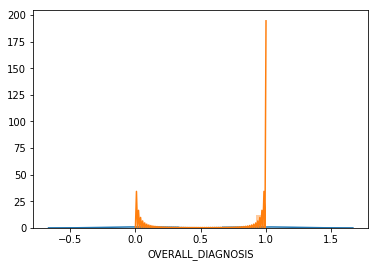

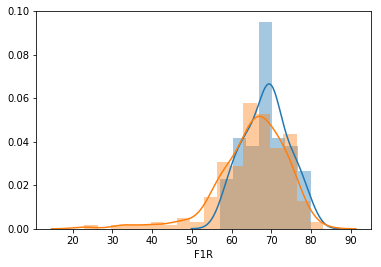

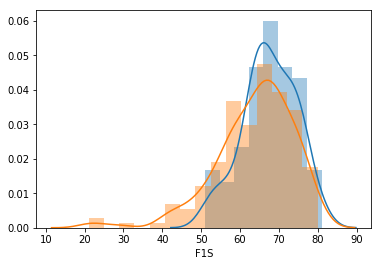

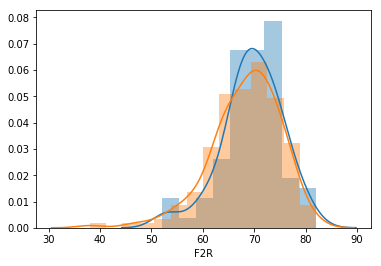

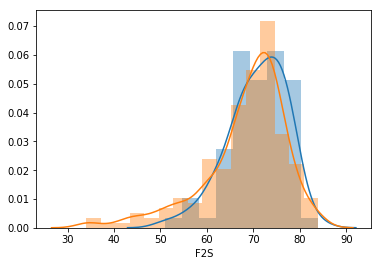

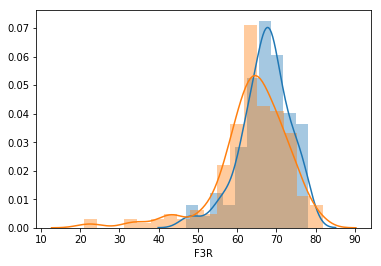

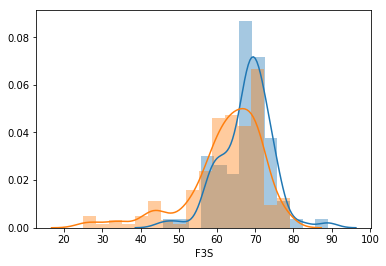

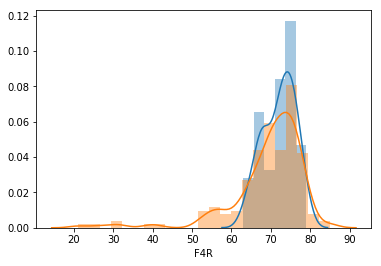

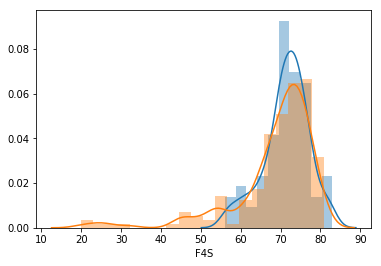

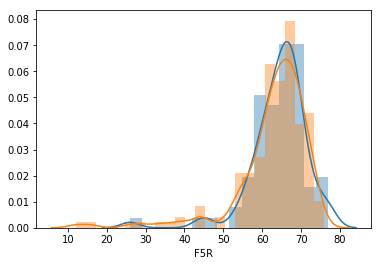

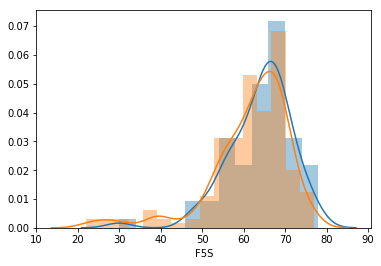

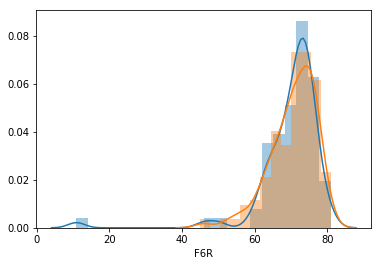

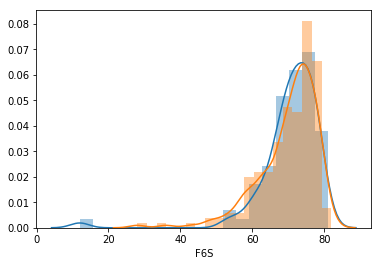

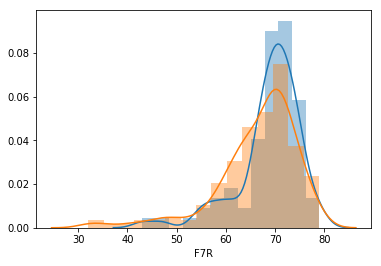

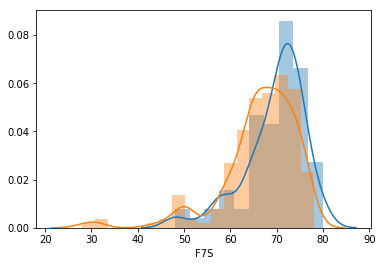

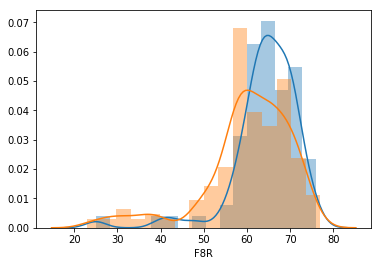

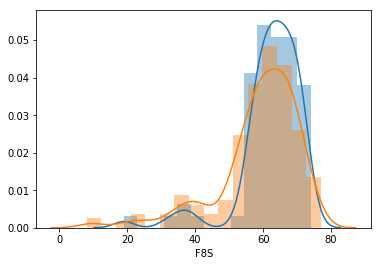

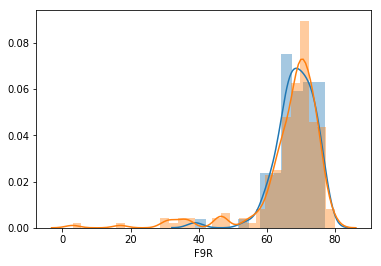

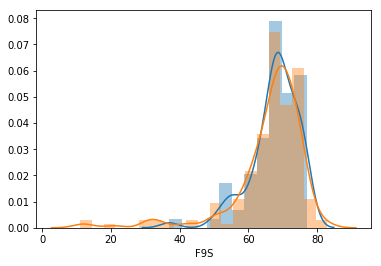

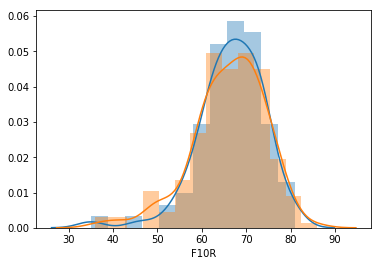

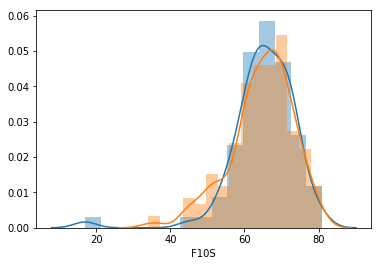

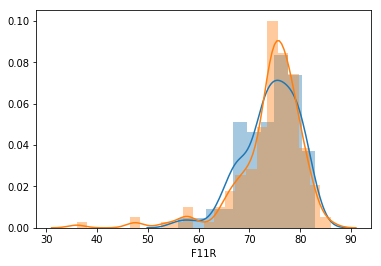

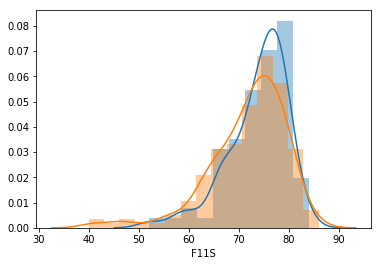

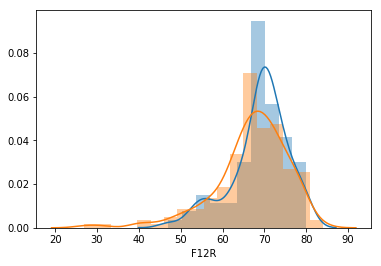

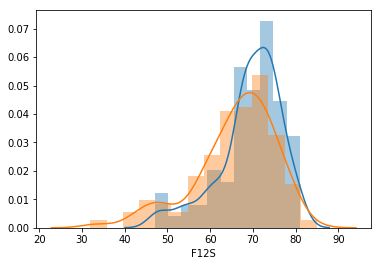

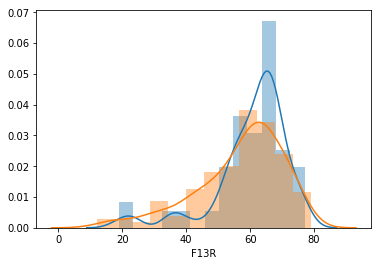

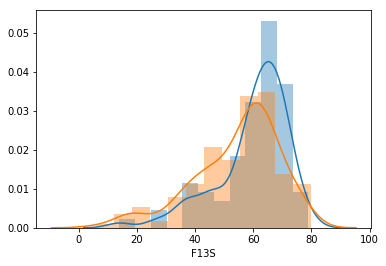

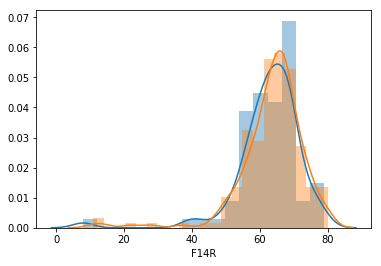

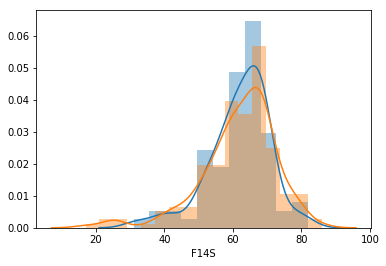

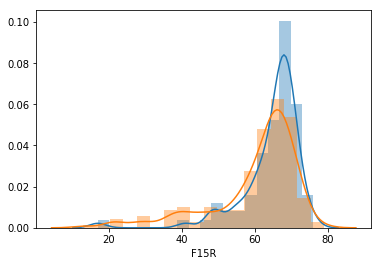

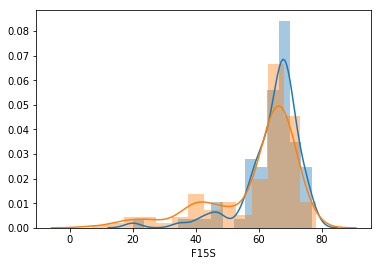

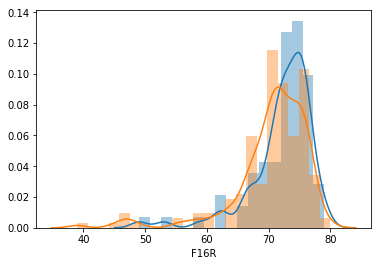

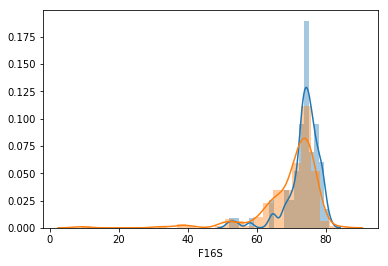

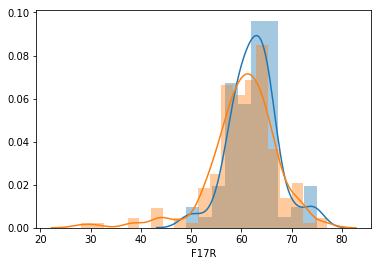

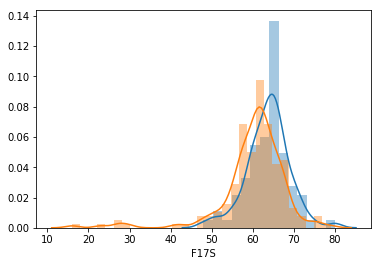

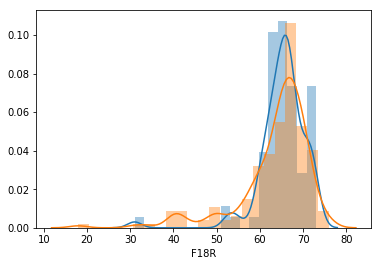

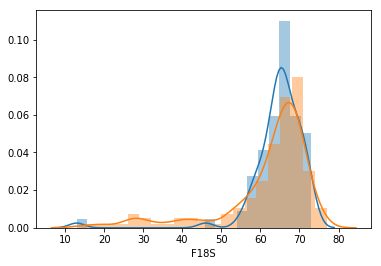

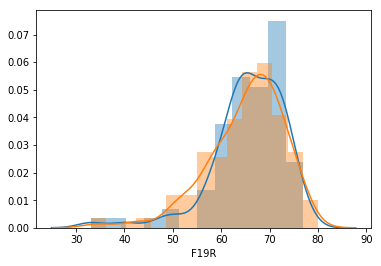

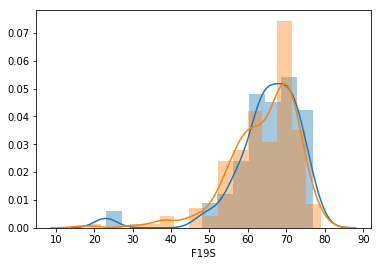

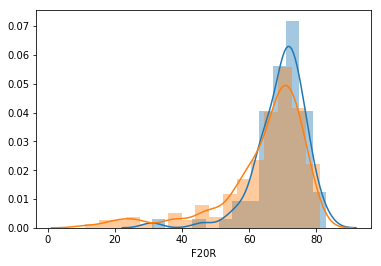

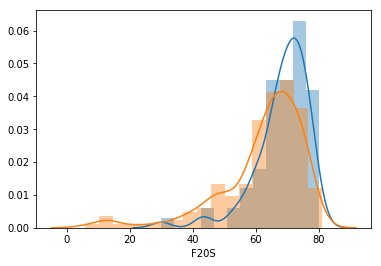

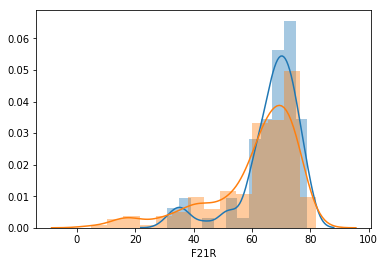

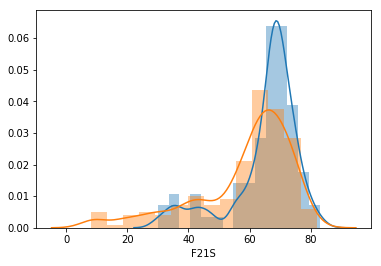

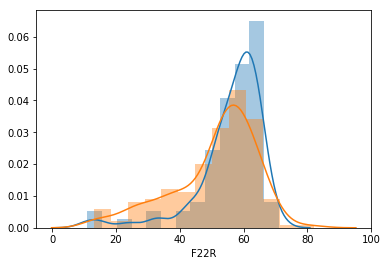

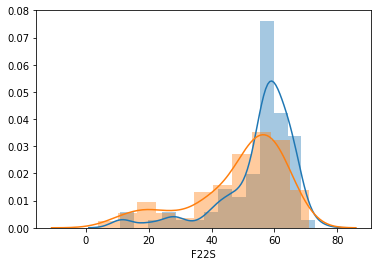

'可以看出训练集和测试集的数据分布基本一致，差异不算太过显著。'

In [5]:
#看看训练集和测试集的数据分布是否一致

for col in train_data.columns:
    sns.distplot(train_data[col])
    sns.distplot(test_data[col])
    plt.show()
'''可以看出训练集和测试集的数据分布基本一致，差异不算太过显著。'''

In [6]:
#----------------------------------------建模------------------------------------------------------------------
#模型1.full model使用全部特征
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split


X_train = train_data.drop('OVERALL_DIAGNOSIS',axis=1)
y_train = train_data['OVERALL_DIAGNOSIS']
X_test = test_data.drop('OVERALL_DIAGNOSIS',axis=1)
y_test = test_data['OVERALL_DIAGNOSIS']

#划分训练和验证集
# X_train,X_validation,y_train,y_validation = train_test_split(train_data,train_target,test_size=0.25,random_state=0)

LR = LogisticRegression(penalty='l1')
LR.fit(X_train,y_train)
print('模型的截距：{}\n协变量权重{}'.format(LR.intercept_,LR.coef_))
print('-'*80)
score = LR.score(X_test,y_test)
print('模型得分:',score)

模型的截距：[0.]
协变量权重[[ 3.19887707e-01  6.71237507e-04 -2.36590951e-01  0.00000000e+00
  -1.48225901e-01  3.97296260e-01  0.00000000e+00 -6.91550108e-02
   1.90245679e-01 -3.35261053e-01  7.50454292e-02  1.13144987e-01
   4.90876847e-01 -2.08000699e-01  6.69004602e-01  0.00000000e+00
   0.00000000e+00 -4.41467625e-01  0.00000000e+00 -8.44788372e-02
   0.00000000e+00  0.00000000e+00  9.32618241e-02  1.47058166e-01
  -3.77953060e-01 -2.73968487e-01  3.17945839e-01 -2.77736710e-01
  -1.95632863e-01 -2.39845162e-01 -2.77601798e-02 -2.59336157e-02
   0.00000000e+00 -3.14345925e-01  3.22974354e-01  6.13952493e-01
   4.87377175e-04  0.00000000e+00  1.35492060e-01 -5.79588191e-01
  -1.52755216e-01 -1.81547447e-01  0.00000000e+00  2.89412591e-01]]
--------------------------------------------------------------------------------
模型得分: 0.6096256684491979


In [7]:
#####################以下做模型优化

In [8]:
###模型2.使用PCA降维
from sklearn.decomposition import PCA
#mle方法自动选择方差适合的特征
pca = PCA(n_components=20,copy=True)
X_train_reduced = pca.fit_transform(X_train)
print("降维后特征数：{}，他们方差占比为：{}" .format(pca.n_components_,pca.explained_variance_ratio_.sum()))
# pca.explained_variance_
# pca.components_
X_train_reduced.shape
'''
降维后特征数：14，他们方差占比为：0.9010059067639149
降维后特征数：20，他们方差占比为：0.9498533198434759
降维后特征数：32，他们方差占比为：0.9908832820253627

'''


降维后特征数：20，他们方差占比为：0.9498533198434759


'\n降维后特征数：14，他们方差占比为：0.9010059067639149\n降维后特征数：20，他们方差占比为：0.9498533198434759\n降维后特征数：32，他们方差占比为：0.9908832820253627\n\n'

In [9]:
LR2 = LogisticRegression(penalty='l1')
LR2.fit(X_train_reduced,y_train)

X_test_reduced = pca.transform(X_test)
print("模型的参数设置：",LR2.get_params)
print('-'*80)
print('模型的截距：{}\n协变量权重{}'.format(LR2.intercept_,LR2.coef_))
print('-'*80)
score2 = LR2.score(X_test_reduced,y_test)
print('模型得分:',score2)
'''
a.若选择降维后特征数为14，penalty为L1，LR2得分为 0.6844919786096256
b.若选择降维后特征数为14，penalty为L2，LR2得分为 0.6844919786096256
c.若选择降维后特征数为20，penalty为L1，LR2得分为 0.6951871657754011(*)
d.若选择降维后特征数为20，penalty为L2，LR2得分为 0.6898395721925134
e.若选择降维后特征数为32，penalty为L1，LR2得分为 0.6951871657754011(*)
f.若选择降维后特征数为32，penalty为L2，LR2得分为 0.6470588235294118

结论：因为32维度仍然过大，所以选择20维，得分仍然最高，虽然损失了5%的信息
'''


模型的参数设置： <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>
--------------------------------------------------------------------------------
模型的截距：[1.41392196]
协变量权重[[ 0.2170844   0.10264305  0.03662069  0.11890298  0.15497963  0.01529232
  -0.15123147 -0.14043351 -0.01299371 -0.01386488 -0.1884494   0.07880214
  -0.03789019 -0.30688067 -0.27891467  0.06368977 -0.14024617  0.25297521
  -0.09375154  0.20622517]]
--------------------------------------------------------------------------------
模型得分: 0.6951871657754011


'\na.若选择降维后特征数为14，penalty为L1，LR2得分为 0.6844919786096256\nb.若选择降维后特征数为14，penalty为L2，LR2得分为 0.6844919786096256\nc.若选择降维后特征数为20，penalty为L1，LR2得分为 0.6951871657754011(*)\nd.若选择降维后特征数为20，penalty为L2，LR2得分为 0.6898395721925134\ne.若选择降维后特征数为32，penalty为L1，LR2得分为 0.6951871657754011(*)\nf.若选择降维后特征数为32，penalty为L2，LR2得分为 0.6470588235294118\n\n结论：因为32维度仍然过大，所以选择20维，得分仍然最高，虽然损失了5%的信息\n'

In [10]:
# #用以上a-e做预测
# test_data_reduced = pca.transform(test_data)

# y_pred2 = LR2.predict(test_data_reduced)
# count = 0
# for i in range(len(y_pred2)):
#     if y_pred2[i] == test_target[i]:
#         count += 1
# pred_score2 = count / len(test_target)
# print("预测正确数：{},  预测准确率：{}".format(count,pred_score2))

# '''
# a预测正确数：140,  预测准确率：0.7486631016042781
# b预测正确数：139,  预测准确率：0.7433155080213903
# c预测正确数：141,  预测准确率：0.7540106951871658(*)
# d预测正确数：136,  预测准确率：0.7272727272727273
# e预测正确数：137,  预测准确率：0.732620320855615
# f预测正确数：120,  预测准确率：0.6417112299465241
# '''

In [11]:
'''[结论1]：从上面分析得知，c(降维后特征数为20，penalty为L1)的泛化能力最强，虽然丢失了5%的原始数据信息。
由pca选出的20个特征训练模型，从结果可以看出有些特征的权重很小,甚至为零。
'''

'[结论1]：从上面分析得知，c(降维后特征数为20，penalty为L1)的泛化能力最强，虽然丢失了5%的原始数据信息。\n由pca选出的20个特征训练模型，从结果可以看出有些特征的权重很小,甚至为零。\n'

In [12]:
# #使用递归消除特征法选择特征

# from sklearn.feature_selection import RFE

# X_train_reduced = pd.DataFrame(X_train_reduced)

# LR3 = LogisticRegression(penalty='l1')
# #选择特征数为9，因为有9个小于0.05
# rfe = RFE(LR3,n_features_to_select=9)
# rfe.fit(X_train_reduced,y_train)
# # rfe.support_
# rfe_select_features = []
# for i in range(len(rfe.support_)):
#     if rfe.support_[i] == True:
#         rfe_select_features.append(X_train_reduced.columns[i])

# rfe_select_features



#使用这9个特征重新训练模型3
# X_train_reduced_rfe = X_train_reduced.iloc[:,rfe_select_features]
# LR3.fit(X_train_reduced_rfe,y_train)

# X_validation_reduced = pd.DataFrame(X_validation_reduced)
# X_validation_reduced_rfe = X_validation_reduced.iloc[:,rfe_select_features]

# print("模型的参数设置：",LR3.get_params)
# print('-'*80)
# print('模型的截距：{}\n协变量权重{}'.format(LR3.intercept_,LR3.coef_))
# print('-'*80)
# score3 = LR3.score(X_validation_reduced_rfe,y_validation)
# print('模型得分:',score3)

# '''
# 基于LR2，选择权重较大的9个特征，penalty为L1，LR3模型得分为0.75
# '''

# #LR3预测
# test_data_reduced_rfe = rfe.transform(test_data_reduced)
# y_pred3 = LR3.predict(test_data_reduced_rfe)

# count = 0
# for i in range(len(y_pred3)):
#     if y_pred3[i] == test_target[i]:
#         count += 1
# pred_score3 = count / len(test_target)
# print("预测正确数：{},  预测准确率：{}".format(count,pred_score3))

In [13]:
#-------------------------------------------------------------------------------------------------
#模型3 基于AIC的最优模型
#查看相关系数
train_corr = train_data.corr(method='pearson')
train_corr['OVERALL_DIAGNOSIS'].sort_values(ascending=False)
#从各自变量和因变量的相关系数看，只有F20S和OVERALL_DIAGNOSIS中度相关(abs>0.5)

OVERALL_DIAGNOSIS    1.000000
F1R                  0.134916
F5R                 -0.001694
F19R                -0.017983
F3R                 -0.032195
F4R                 -0.043057
F9R                 -0.074458
F18R                -0.081470
F6R                 -0.090127
F11R                -0.096580
F10R                -0.114378
F7R                 -0.134440
F14R                -0.146302
F17S                -0.150225
F1S                 -0.153489
F6S                 -0.156661
F9S                 -0.174335
F17R                -0.178427
F19S                -0.182488
F8R                 -0.190110
F18S                -0.211905
F16R                -0.221958
F5S                 -0.230602
F4S                 -0.244278
F12R                -0.246207
F10S                -0.246964
F3S                 -0.256404
F2R                 -0.264282
F7S                 -0.290655
F8S                 -0.291540
F15R                -0.323575
F16S                -0.323664
F22S                -0.327979
F11S      

In [14]:
#使用向前逐步法从其它备选变量中选择变量
import statsmodels.formula.api as smf
import statsmodels.api as sm
data = pd.concat([X_train,y_train],axis=1)
lr = smf.glm('OVERALL_DIAGNOSIS~F20S',data=data,
             family=sm.families.Binomial(sm.families.links.logit)).fit()
print(lr.summary())

#回归系数P值均通过检验!

                 Generalized Linear Model Regression Results                  
Dep. Variable:      OVERALL_DIAGNOSIS   No. Observations:                   80
Model:                            GLM   Df Residuals:                       78
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.067
Date:                Wed, 08 May 2019   Deviance:                       78.135
Time:                        09:09:06   Pearson chi2:                     75.3
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.2841      4.477      4.084      0.000       9.509      27.059
F20S          -0.2628      0.064     -4.131      0.0

In [15]:
# 向前逐步法
def forward_select_aic(data,response):
    remaining=set(data.columns)
    remaining.remove(response)
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula='{}~{}'.format(
                response,'+'.join(selected+[candidate]))
            aic=smf.glm(
                formula=formula,data=data,
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic,candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score,best_candidate=aic_with_candidates.pop()
        if current_score>best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score=best_new_score
            print('aic is {},continuing!'.format(current_score))
        else:
            print('forward selection over!')
            break
    formula='{}~{}'.format(response,'+'.join(selected))
    print('final formula is {}'.format(formula))
    model=smf.glm(
        formula=formula,data=data,
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [16]:
LR3 = forward_select_aic(data=data,response='OVERALL_DIAGNOSIS')
print(LR3.summary())

#有的系数没通过p值检验，如何优化？

aic is 82.13477109175518,continuing!
aic is 69.17504152904993,continuing!
aic is 60.76289283442703,continuing!
aic is 57.62230173114203,continuing!
aic is 55.23886872165046,continuing!
aic is 54.86197975808872,continuing!
aic is 53.95464461426535,continuing!
aic is 52.95386795468896,continuing!
forward selection over!
final formula is OVERALL_DIAGNOSIS~F20S+F13S+F5S+F17R+F19R+F14S+F14R+F1R
                 Generalized Linear Model Regression Results                  
Dep. Variable:      OVERALL_DIAGNOSIS   No. Observations:                   80
Model:                            GLM   Df Residuals:                       71
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.477
Date:                Wed, 08 May 2019   Deviance:                       34.954
Time:                        09:09:15   Pearson chi2: 

In [17]:
#模型4 基于BIC的最优模型
# 向前逐步法
def forward_select_bic(data,response):
    remaining=set(data.columns)
    remaining.remove(response)
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')
    while remaining:
        bic_with_candidates=[]
        for candidate in remaining:
            formula='{}~{}'.format(
                response,'+'.join(selected+[candidate]))
            bic=smf.glm(
                formula=formula,data=data,
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().bic
            bic_with_candidates.append((bic,candidate))
        bic_with_candidates.sort(reverse=True)
        best_new_score,best_candidate=bic_with_candidates.pop()
        if current_score>best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score=best_new_score
            print('bic is {},continuing!'.format(current_score))
        else:
            print('forward selection over!')
            break
    formula='{}~{}'.format(response,'+'.join(selected))
    print('final formula is {}'.format(formula))
    model=smf.glm(
        formula=formula,data=data,
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [18]:
LR4 = forward_select_bic(data=data,response='OVERALL_DIAGNOSIS')
print(LR4.summary())


bic is -263.6633064128076,continuing!
bic is -274.24100934083896,continuing!
bic is -280.27113140078797,continuing!
bic is -281.02969586939906,continuing!
bic is -281.03110224421675,continuing!
forward selection over!
final formula is OVERALL_DIAGNOSIS~F20S+F13S+F5S+F17R+F19R
                 Generalized Linear Model Regression Results                  
Dep. Variable:      OVERALL_DIAGNOSIS   No. Observations:                   80
Model:                            GLM   Df Residuals:                       74
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.619
Date:                Wed, 08 May 2019   Deviance:                       43.239
Time:                        09:09:19   Pearson chi2:                     60.1
No. Iterations:                     8   Covariance Type:             nonrobust
            

In [19]:
#----------------------------------------------模型评估-----------------------------------------------------------
from sklearn import metrics

# LR模型预测
test_data['LR_pred']=LR.predict(X_test)

# LR2模型预测
test_data['LR2_pred']=LR2.predict(X_test_reduced)

# LR3模型预测
test_data['LR3_prob'] = LR3.predict(X_test)


# LR4模型预测
test_data['LR4_prob'] = LR4.predict(X_test)


In [20]:
# 计算准确率
LR3_pred=(test_data['LR3_prob']>0.5).astype('int')
LR4_pred=(test_data['LR4_prob']>0.5).astype('int')
test_data['LR3_pred'] = LR3_pred
test_data['LR4_pred'] = LR4_pred

LR_acc=sum(test_data['LR_pred']==y_test)/np.float(len(y_test))
LR2_acc=sum(test_data['LR2_pred']==y_test)/np.float(len(y_test))
LR3_acc=sum(test_data['LR3_pred']==y_test)/np.float(len(y_test))
LR4_acc=sum(test_data['LR4_pred']==y_test)/np.float(len(y_test))

print('The accurancy of LR is %.2f'%LR_acc,'\n')
print('The accurancy of LR2 is %.2f'%LR2_acc,'\n')
print('The accurancy of LR3 is %.2f'%LR3_acc,'\n')
print('The accurancy of LR4 is %.2f'%LR4_acc,'\n')

The accurancy of LR is 0.61 

The accurancy of LR2 is 0.70 

The accurancy of LR3 is 0.74 

The accurancy of LR4 is 0.78 



In [21]:
# 混淆矩阵   
LR_confusion_matrix=pd.crosstab(test_data.LR_pred,y_test,margins=True)
LR2_confusion_matrix=pd.crosstab(test_data.LR2_pred,y_test,margins=True)
LR3_confusion_matrix=pd.crosstab(test_data.LR3_pred,y_test,margins=True)
LR4_confusion_matrix=pd.crosstab(test_data.LR4_pred,y_test,margins=True)


 # 计算评估指标    
print('LR评估指标','\n',metrics.classification_report(y_test, test_data.LR_pred)) 
print('LR2评估指标','\n',metrics.classification_report(y_test, test_data.LR2_pred))  
print('LR3评估指标','\n',metrics.classification_report(y_test, test_data.LR3_pred)) 
print('LR4评估指标','\n',metrics.classification_report(y_test, test_data.LR4_pred)) 

LR评估指标 
               precision    recall  f1-score   support

           0       0.10      0.47      0.16        15
           1       0.93      0.62      0.75       172

   micro avg       0.61      0.61      0.61       187
   macro avg       0.51      0.54      0.45       187
weighted avg       0.86      0.61      0.70       187

LR2评估指标 
               precision    recall  f1-score   support

           0       0.15      0.60      0.24        15
           1       0.95      0.70      0.81       172

   micro avg       0.70      0.70      0.70       187
   macro avg       0.55      0.65      0.52       187
weighted avg       0.89      0.70      0.76       187

LR3评估指标 
               precision    recall  f1-score   support

           0       0.18      0.60      0.27        15
           1       0.96      0.76      0.84       172

   micro avg       0.74      0.74      0.74       187
   macro avg       0.57      0.68      0.56       187
weighted avg       0.89      0.74      0.80  

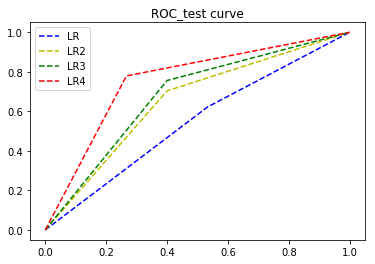

LR_AUC=0.5444
LR2_AUC=0.6517
LR3_AUC=0.6779
LR4_AUC=0.7562


In [22]:
# 绘制Roc曲线    
import sklearn.metrics as metrics

LR_fpr_test,LR_tpr_test,LR_th_test=metrics.roc_curve(y_test,test_data.LR_pred)#转为prob？

LR2_fpr_test,LR2_tpr_test,LR2_th_test=metrics.roc_curve(y_test,test_data.LR2_pred)

LR3_fpr_test,LR3_tpr_test,LR3_th_test=metrics.roc_curve(y_test,test_data.LR3_pred)

LR4_fpr_test,LR4_tpr_test,LR4_th_test=metrics.roc_curve(y_test,test_data.LR4_pred)



plt.plot(LR_fpr_test,LR_tpr_test,'b--',label='LR')
plt.plot(LR2_fpr_test,LR2_tpr_test,'y--',label='LR2')
plt.plot(LR3_fpr_test,LR3_tpr_test,'g--',label='LR3')
plt.plot(LR4_fpr_test,LR4_tpr_test,'r--',label='LR4')
plt.title('ROC_test curve')
plt.legend(loc='best')
plt.show()

print('LR_AUC=%.4f'%metrics.auc(LR_fpr_test,LR_tpr_test))
print('LR2_AUC=%.4f'%metrics.auc(LR2_fpr_test,LR2_tpr_test))
print('LR3_AUC=%.4f'%metrics.auc(LR3_fpr_test,LR3_tpr_test))
print('LR4_AUC=%.4f'%metrics.auc(LR4_fpr_test,LR4_tpr_test))

#从四个模型的测试数据的ROC曲线和AUC值看，LR4模型优于其他模型。